In [ ]:
import HMC5883L_Library as hmc
%matplotlib inline

Iteration #0
--------------------------------------------------
Enter desired data points: 
160
--------------------------------------------------
Time remaining: 2seconds
--------------------------------------------------
        X      Y     Z
159  1.19 -43.19  4.95
158 -4.81  76.81 -5.05
157 -3.81  44.81 -4.05
156  4.19 -30.19  1.95
155 -0.81  25.81 -2.05
154 -1.81 -38.19  2.95
153 -0.81  34.81 -2.05
152  2.19 -19.19 -3.05
151 -1.81  14.81  2.95
150 -2.81  -4.19  0.95
149  2.19  -2.19  2.95
148 -2.81  15.81 -6.05
147  2.19 -22.19  3.95
146 -2.81  30.81 -6.05
145  0.19 -33.19  5.95
144 -2.81  47.81 -5.05
143  5.19 -74.19  2.95
142 -4.81  56.81 -7.05
141  0.19 -58.19  5.95
140 -2.81  67.81 -6.05
139  4.19 -61.19  5.95
138 -5.81  65.81 -6.05
137  5.19 -60.19  5.95
136 -2.81  63.81 -6.05
135  2.19 -53.19  5.95
134 -3.81  53.81 -4.05
133  7.19 -68.19  4.95
132 -1.81  44.81 -3.05
131  3.19 -53.19  0.95
130 -0.81  26.81 -0.05
..    ...    ...   ...
29   0.19 -43.19  0.95
28  -2.81  16.81 -

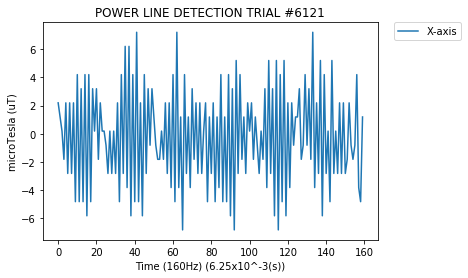

--------------------------------------------------
Saved #6121 in: C:/Users/jd17033/Desktop/mfvd/Saves/


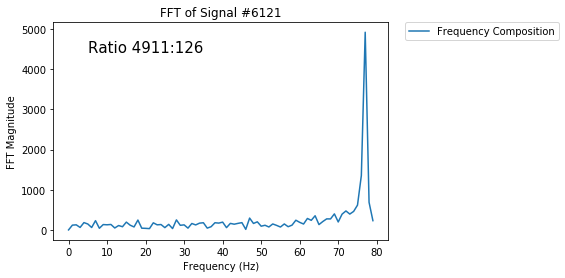

--------------------------------------------------
Do you want to Quit? [Y / n]


In [ ]:
###  MAIN PROGRAM   ###

# Prompts user to configure settings/options associated with the HMC5883L.
hmc.Settings_Config()

i = 0

# Entire program runs on a loop until explicitly exited.
while(1):
    
    # Clears output terminal.
    hmc.clear_output()
    
    # Responisble for prompting user and recording the input.
    hmc.Prompt_Iteration_Amount(i)
    
    # Prepares the ESP32 for data transmission.
    hmc.Begin_Signal()

    hmc.Set_Average()
    
    # Constantly reads in 1 seconds worth of data (160 data points). Prints out
    #   strength of signal based on min and max of the FFT's frequency ratio.
    if(hmc.Operation_Mode == "CONTINUOUS_MODE"):
        while(1):
            
            # Collects incoming data from the ESP32/HMC5883L.
            df = hmc.Collect_Data()
            
            # Clears output terminal.
            hmc.clear_output()

            # Displays signal strength to screen.
            hmc.Display_Signal_Strength(df,i)
    
    # Reads in a user set amount of data. Proceeds to save/print out results in table/graph form.
    elif(hmc.Operation_Mode == "STATIONARY_MODE"):
        
        # Estimates time until completion of data collection and plotting.
        hmc.Time_Until_Done()
        
        # Collects incoming data from the ESP32/HMC5883L.
        df = hmc.Collect_Data()
        
        # Displays the data collected from the magnetometer.
        hmc.Display_Table(df) #DataFrame Table
        hmc.Display_DF(df,i)  #DataFrame Graph
        hmc.Display_FFT(df)   #DataFrame FFT

        # Prompts user to decide if they wish to continue or quit.
        print("Do you want to Quit? [Y / n]")
        quit = input()
        if(quit == 'Y'):
            # Closes serial port.
            hmc.Serial_Close()
            break
        else:
            i = i + 1